In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [15]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [17]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [19]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
...,...,...
200,2018-08-26,5302
201,2018-08-28,5983
202,2018-08-29,4969
203,2018-08-30,4648


Вывести несколько первых строк сгруппированных данных

In [21]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

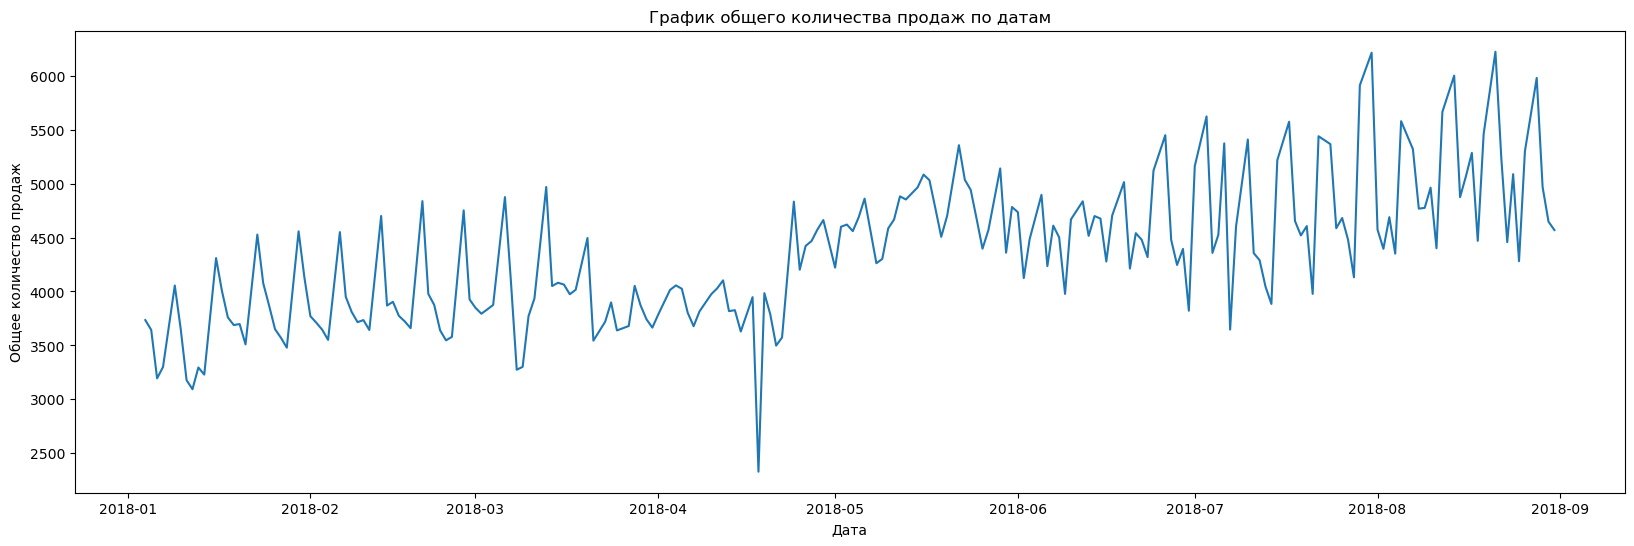

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'])
plt.title('График общего количества продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Общее количество продаж')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
На графике присутствуют регулярные пики продаж, которые могут указывать на определенные всплески спроса, вероятно, в начале или конце недели. 
В середине лета (июнь-июль) продажи становятся более стабильными, но затем снова начинают возрастать к августу.
В апреле и мае можно заметить резкие падения продаж. Как будто там продают школьные пренадлежности.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [25]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [27]:
df['День недели'] = df['Дата'].dt.dayofweek

filtered_df = df[(df['Склад'] == 3) & (df['День недели'] == 2) & (df['Дата'].dt.month.isin([6, 7, 8]))]

grouped_df_2 = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()
top_product = grouped_df_2.loc[grouped_df_2['Количество'].idxmax()]

print(top_product)

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [29]:
weather_df = pd.read_csv('Блок_3_cleaned.csv')

In [31]:
weather_df.head(20)

,Дата,T
0,31.08.2018,8.2
1,31.08.2018,9.6
2,31.08.2018,11.3
3,31.08.2018,12.3
4,31.08.2018,13.2
5,31.08.2018,12.5
6,31.08.2018,10.3
7,31.08.2018,10.8
8,30.08.2018,11.1
9,30.08.2018,17.1


In [33]:
grouped_weather_df = weather_df.groupby('Дата')['T'].mean().reset_index()
grouped_weather_df

,Дата,T
0,01.02.2018,-16.9000
1,01.03.2018,-17.7625
2,01.04.2018,-7.6875
3,01.05.2018,7.8250
4,01.06.2018,19.9750
...,...,...
235,31.01.2018,-13.2125
236,31.03.2018,-8.0000
237,31.05.2018,13.9500
238,31.07.2018,15.4375


In [35]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], format='%d.%m.%Y')
grouped_weather_df['Дата'] = pd.to_datetime(grouped_weather_df['Дата'], format='%d.%m.%Y')

df_merged = pd.merge(grouped_df, grouped_weather_df, on='Дата', how='outer')

print(df_merged.head())

        Дата  Количество        T
0 2018-01-04      3734.0 -14.0750
1 2018-01-05      3643.0 -16.8625
2 2018-01-06      3193.0 -13.3000
3 2018-01-07      3298.0 -12.7500
4 2018-01-08         NaN -15.4125


In [37]:
df_merged_cleaned = df_merged.dropna()
print(df_merged_cleaned.head())

        Дата  Количество        T
0 2018-01-04      3734.0 -14.0750
1 2018-01-05      3643.0 -16.8625
2 2018-01-06      3193.0 -13.3000
3 2018-01-07      3298.0 -12.7500
5 2018-01-09      4055.0  -6.2500


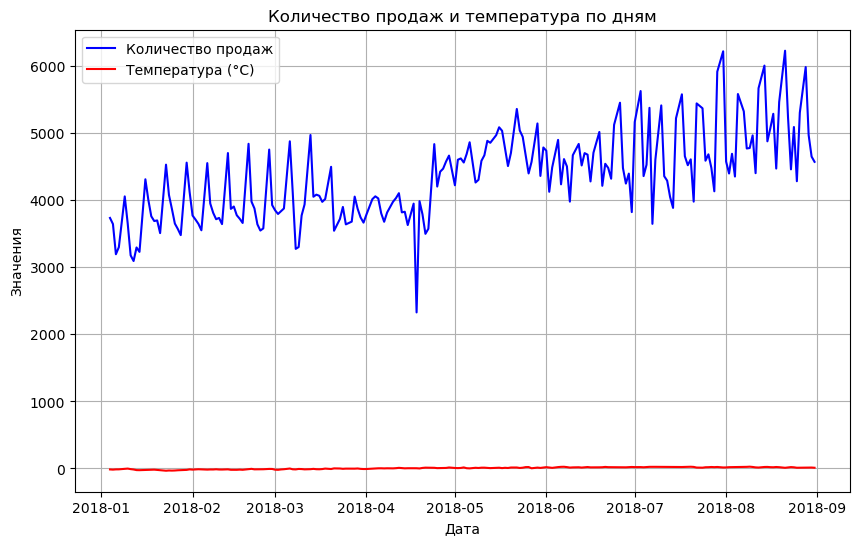

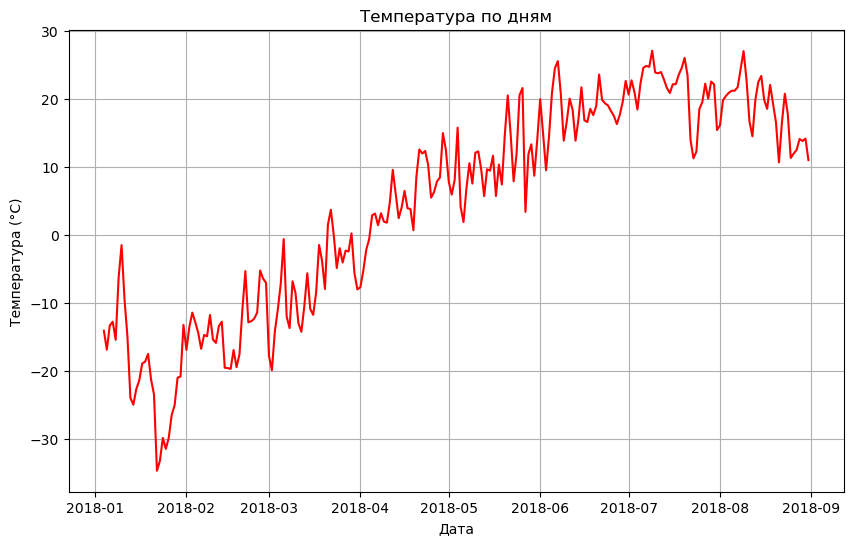

In [39]:
plt.figure(figsize=(10, 6))

plt.plot(df_merged_cleaned['Дата'], df_merged_cleaned['Количество'], label='Количество продаж', color='blue')
plt.plot(df_merged_cleaned['Дата'], df_merged_cleaned['T'], label='Температура (°C)', color='red')
plt.title('Количество продаж и температура по дням')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

# Построение отдельного графика температуры
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Дата'], df_merged['T'], label='Температура (°C)', color='red')
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

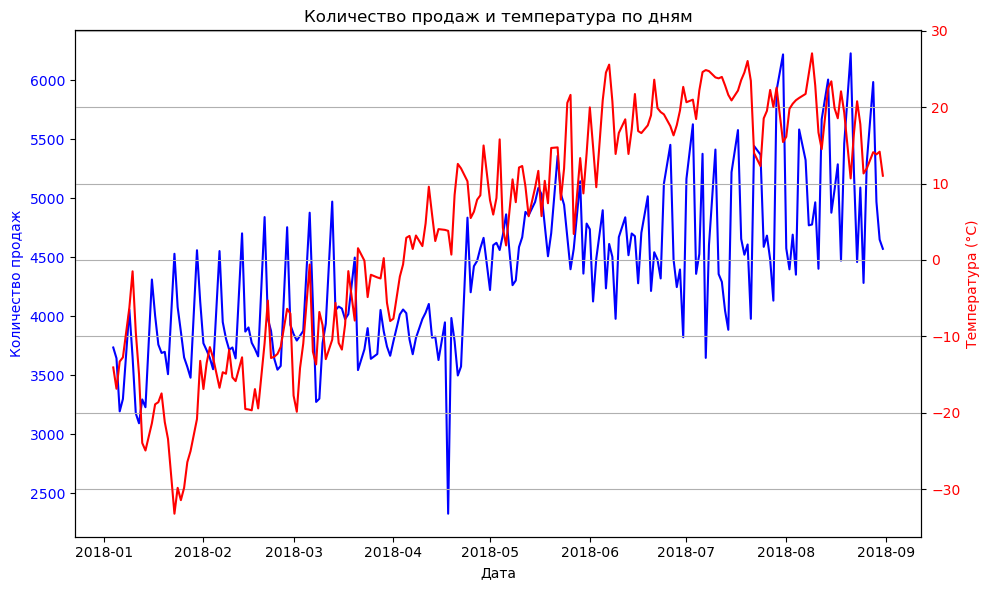

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_merged_cleaned['Дата'], df_merged_cleaned['Количество'], label='Количество продаж', color='blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_merged_cleaned['Дата'], df_merged_cleaned['T'], label='Температура (°C)', color='red')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Количество продаж и температура по дням')
fig.tight_layout()  
plt.grid(True)
plt.show()